In [10]:
from timuscle.dataio import loadHDF5asdict
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from dispest import calc_kasai

In [11]:
data = loadHDF5asdict("output.h5")
lat = data['lat']
axial = data['axial']

ex_axlat = 1E3*np.array([lat[0], lat[-1], axial[-1], axial[0]])

In [12]:
data['bmodes'].shape

(89, 3, 1040, 501)

In [13]:
I = data['bmodes'].real
Q = data['bmodes'].imag

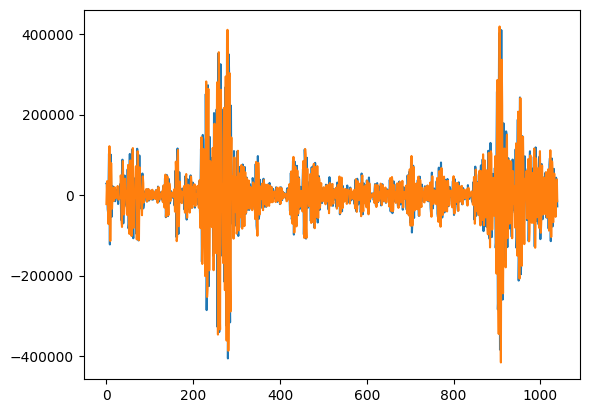

In [14]:
plt.figure()
plt.plot(I[0,0,:,250])
plt.plot(Q[0,0,:,250])

In [15]:
vel = calc_kasai(np.mean(I, axis=1), np.mean(Q, axis=1), 0, 5.2E6, ksize=1, kaxis=1, mode='differential')/0.3

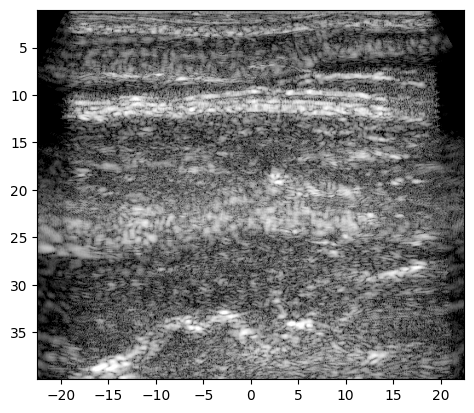

In [16]:
env = np.abs(np.mean(I[0,:,:,:] + 1j*Q[0,:,:,:], axis=0))
logged = 20 * np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, vmin=-35, vmax=5, cmap='gray', extent=ex_axlat)
plt.show()

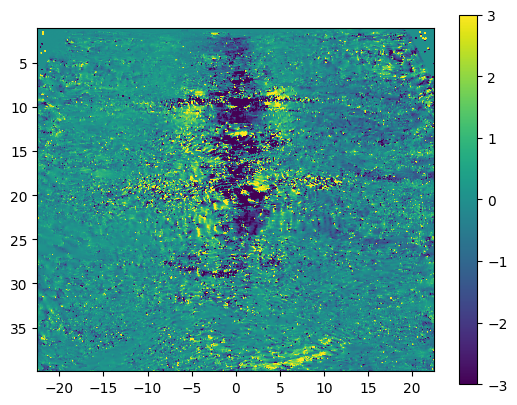

In [17]:
plt.figure()
plt.imshow(vel[10], extent=ex_axlat, vmin=-3, vmax=3)
plt.colorbar()
plt.show()

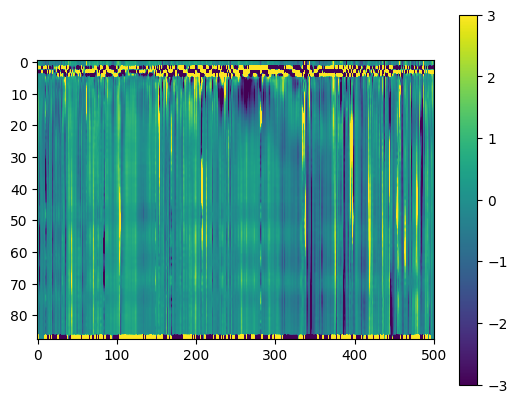

In [18]:
plt.figure()
plt.imshow(vel[:, 570], vmin=-3, vmax=3, aspect=4)
plt.colorbar()
plt.show()